# Ex
### Exercise 6.1
- 9, 11, 17, 21, 26, 27

### Exercise 6.2
- 4, 8, 17, 23, 27, 37, 41

### Exercise 6.3
- 3, 6, 7, 21, 24, 26, 27, 29, 34, 37, 38

# Com Ex
### Computer Exercise 6.1
- 4

### Computer Exercise 6.2
- 4, 11

### Computer Exercise 6.3
- 7, 19

In [34]:
import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

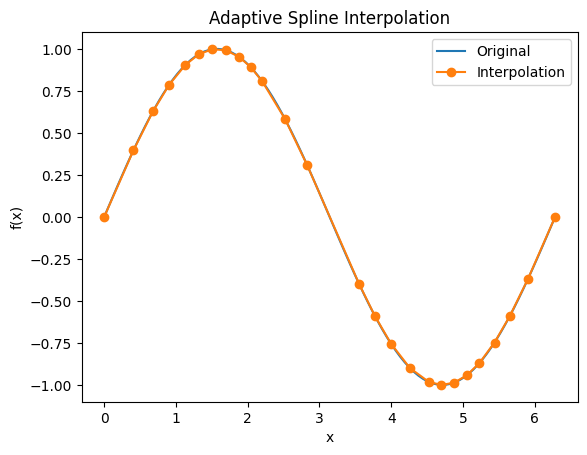

In [35]:
# 6.1 - 4

def adaptive_spline_interpolation(f, a, b, tol=0.01):
    nodes = [a, b]
    
    done = False
    while not done:
        done = True
        new_nodes = []
        nodes.sort()
        
        for i in range(len(nodes) - 1):
            t0 = nodes[i]
            t1 = nodes[i + 1]
            sample_points = [t0 + j * (t1 - t0) / 10 for j in range(10)]
            max_error = 0
            max_x = None
            
            for x in sample_points:
                Sx = f(t0) + (f(t1) - f(t0)) * (x - t0) / (t1 - t0)
                err = abs(Sx - f(x))
                
                if err > max_error:
                    max_error = err
                    max_x = x
                    
            if max_error > tol:
                new_nodes.append(max_x)
                done = False
            
        if new_nodes:
            nodes.extend(new_nodes)
            
    nodes.sort()
    return nodes, [f(x) for x in nodes]

f = np.sin
a = 0
b = 2 * np.pi

x, y = adaptive_spline_interpolation(f, a, b, tol=0.01)
plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), label='Original')
plt.plot(x, y, 'o-', label='Interpolation')
plt.title('Adaptive Spline Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

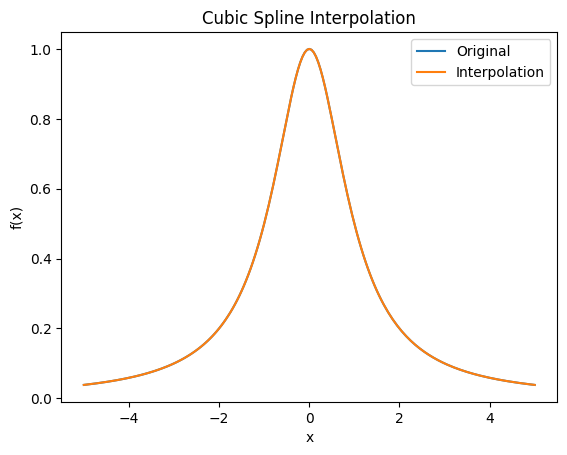

S(0.0) = 0.9999999999999999, f(0.0) = 1.0, error = 1.1102230246251565e-16
S(0.05000000000000071) = 0.9974028120835318, f(0.05000000000000071) = 0.9975062344139649, error = 0.00010342233043314497
S(0.10000000000000053) = 0.9898554950741247, f(0.10000000000000053) = 0.9900990099009901, error = 0.0002435148268653542
S(0.15000000000000036) = 0.9777244190817755, f(0.15000000000000036) = 0.9779951100244497, error = 0.0002706909426741788
S(0.20000000000000018) = 0.9613759542164801, f(0.20000000000000018) = 0.9615384615384615, error = 0.0001625073219813089
S(0.25) = 0.9411764705882353, f(0.25) = 0.9411764705882353, error = 0.0
S(0.3000000000000007) = 0.9175304445082155, f(0.3000000000000007) = 0.9174311926605501, error = 9.925184766546025e-05
S(0.35000000000000053) = 0.8909947770923127, f(0.35000000000000053) = 0.8908685968819597, error = 0.00012618021035293303
S(0.40000000000000036) = 0.8621644756575959, f(0.40000000000000036) = 0.8620689655172411, error = 9.551014035480421e-05
S(0.4500000000

In [36]:
# 6.2 - 4

def cubic_spline_interpolation_coef(f, a, b, n, y = None):
    x = np.linspace(a, b, n)
    if y is None:
        y = f(x)
    h = np.diff(x)
    b = np.diff(y) / h
    
    u = np.zeros(n)
    v = np.zeros(n)
    z = np.zeros(n)
    
    u[0] = 1
    u[-1] = 1
    v[0] = 0
    v[-1] = 0
    
    for i in range(1, n - 1):
        if i == 1:
            u[i] = 2 * (h[i - 1] + h[i])
            v[i] = 6 * (b[i] - b[i - 1])
        else:
            u[i] = 2 * (h[i - 1] + h[i]) - h[i - 1]**2 / u[i - 1]
            v[i] = 6 * (b[i] - b[i - 1]) - h[i - 1] * v[i - 1] / u[i - 1]
    
    for i in range(n - 2, 0, -1):
        z[i] = (v[i] - h[i] * z[i + 1]) / u[i]
    
    return x, y, z

def cubic_spline_interpolation_eval(f, a, b, n, x_eval, y=None):
    x, y, z = cubic_spline_interpolation_coef(f, a, b, n, y)
    h = np.diff(x)
    
    S = np.zeros_like(x_eval)
    
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x, xi) - 1
        if j < 0:
            j = 0
        elif j >= len(h):
            j = len(h) - 1
        
        dx = xi - x[j]
        b_coef = (y[j+1] - y[j]) / h[j] - h[j] * (2 * z[j] + z[j+1]) / 6
        S[i] = y[j] + b_coef * dx + (z[j] / 2) * dx**2 + ((z[j+1] - z[j]) / (6 * h[j])) * dx**3
    
    return S


f = lambda x: 1 / (1 + x ** 2)
a = -5
b = 5
n = 41
x_eval = np.linspace(a, b, 201)

S = cubic_spline_interpolation_eval(f, a, b, n, x_eval)
plt.plot(x_eval, f(x_eval), label='Original')
plt.plot(x_eval, S, label='Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

for x in x_eval:
    if x >= 0:
        print(f"S({x}) = {S[np.searchsorted(x_eval, x)]}, f({x}) = {f(x)}, error = {abs(S[np.searchsorted(x_eval, x)] - f(x))}")

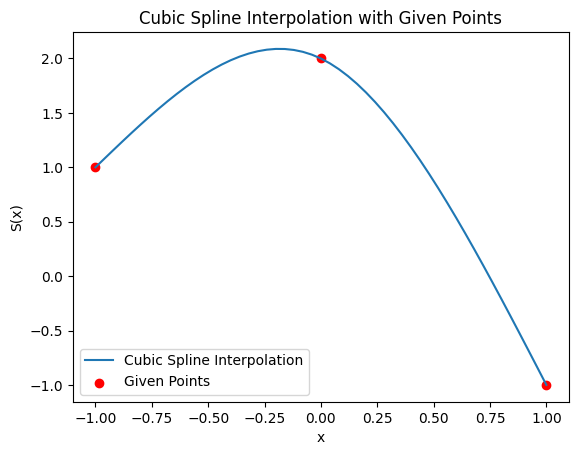

In [37]:
# 6.2 - 11
x = [-1, 0, 1]
y = [1, 2, -1]
x_eval = np.linspace(-1, 1, 51)

S = cubic_spline_interpolation_eval(x, -1, 1, 3, x_eval, y)

plt.plot(x_eval, S, label='Cubic Spline Interpolation')
plt.scatter(x, y, color='red', label='Given Points')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('Cubic Spline Interpolation with Given Points')
plt.legend()
plt.show()


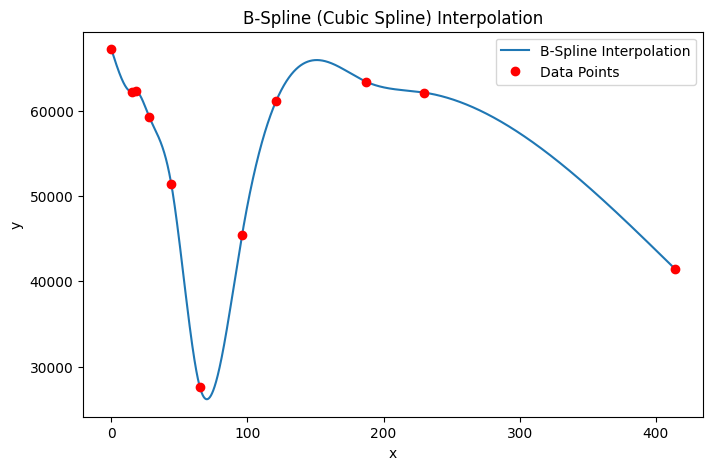

Integral of B-Spline interpolation: 22720667.520836458
Average value of B-Spline interpolation: 54880.83942231028


In [38]:
# 6.3 - 7

def simple_trapezoidal(x, y):
    h = np.diff(x)
    ret = 0
    for i in range(len(h)):
        ret += (y[i] + y[i + 1]) * h[i] / 2
    return ret

def bspline_2nd_coef(f, a, b, n, x=None, y=None):
    if x is None:
        x = np.linspace(a, b, n)
    else:
        n = len(x)
    if y is None:
        y = f(x)
        
    h = np.diff(x)
    A = np.zeros((n, n))
    b_vec = np.zeros(n)
    
    A[0, 0] = 1
    A[-1, -1] = 1
    
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i]   = 2*(h[i-1] + h[i])
        A[i, i+1] = h[i]
        b_vec[i]  = 6 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    M = np.linalg.solve(A, b_vec)
    return M, x

def bspline_2nd_eval(f, a, b, n, x_eval, x=None, y=None):
    M, x = bspline_2nd_coef(f, a, b, n, x, y)
    if y is None:
        y = f(x)
    
    S = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x, xi) - 1
        if j < 0:
            j = 0
        elif j >= len(x) - 1:
            j = len(x) - 2
        h_j = x[j+1] - x[j]
        A = (x[j+1] - xi) / h_j
        B = (xi - x[j]) / h_j
        S[i] = A * y[j] + B * y[j+1] + ((A**3 - A) * M[j] + (B**3 - B) * M[j+1]) * (h_j**2) / 6
    return S

x_nodes = np.array([0, 15, 18, 28, 44, 65, 96, 121, 187, 230, 414])
y_nodes = np.array([67259, 62280, 62350, 59250, 51457, 27603, 45435, 61162, 63455, 62164, 41471])

x_eval = np.linspace(0, 414, 1000000)
S = bspline_2nd_eval(lambda t: np.sin(t), 0, 230, len(x_nodes), x_eval, x_nodes, y_nodes)

plt.figure(figsize=(8, 5))
plt.plot(x_eval, S, label='B-Spline Interpolation')
plt.plot(x_nodes, y_nodes, 'ro', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('B-Spline (Cubic Spline) Interpolation')
plt.show()

integral = simple_trapezoidal(x_eval, S)
print(f"Integral of B-Spline interpolation: {integral}")
print(f"Average value of B-Spline interpolation: {integral / (x_eval[-1] - x_eval[0])}")


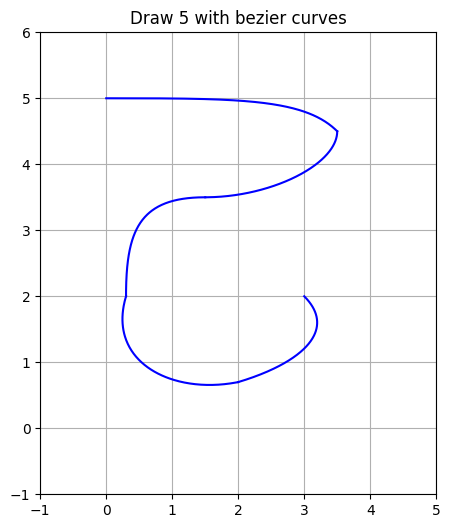

In [ ]:
# 6.3 - 19

def bezier_curve(p0, p1, p2, p3, num_points=100):
    t = np.linspace(0, 1, num_points)
    x = (1 - t)**3 * p0[0] + 3 * (1 - t)**2 * t * p1[0] + 3 * (1 - t) * t**2 * p2[0] + t**3 * p3[0]
    y = (1 - t)**3 * p0[1] + 3 * (1 - t)**2 * t * p1[1] + 3 * (1 - t) * t**2 * p2[1] + t**3 * p3[1]
    return x, y

bezier_segments = [
    [(0, 5), (2, 5), (3, 5), (3.5, 4.5)],
    [(3.5, 4.5), (3.5, 4), (2.5, 3.5), (1.5, 3.5)],
    [(1.5, 3.5), (0.5, 3.5), (0.3, 3), (0.3, 2)],
    [(0.3, 2), (0, 1), (1, 0.5), (2, 0.7)],
    [(2, 0.7), (3, 1), (3.5, 1.5), (3, 2)]
]

plt.figure(figsize=(6, 6))
all_x, all_y = [], []

for seg in bezier_segments:
    p0, p1, p2, p3 = seg
    x_vals, y_vals = bezier_curve(p0, p1, p2, p3, num_points=200)
    
    plt.plot(x_vals, y_vals, 'b-')

    all_x.extend(x_vals)
    all_y.extend(y_vals)

plt.xlim(-1, 5)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Draw 5 with bezier curves")
plt.grid(True)
plt.show()


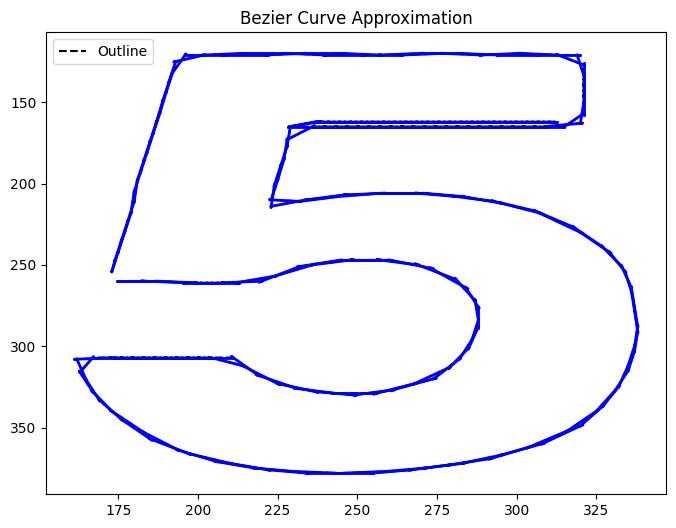

In [ ]:
def bezier_point(t, P0, P1, P2, P3):
    return (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t) * t**2 * P2 + t**3 * P3

def evaluate_bezier(P0, P1, P2, P3, num=100):
    t_vals = np.linspace(0, 1, num)
    curve = np.array([bezier_point(t, P0, P1, P2, P3) for t in t_vals])
    return curve

def chord_length_parameterize(points):
    distances = [0]
    for i in range(1, len(points)):
        distances.append(np.linalg.norm(points[i] - points[i-1]))
    cumulative = np.cumsum(distances)
    total = cumulative[-1]
    if total == 0:
        return [0 for _ in cumulative]
    return cumulative / total

def bezier_curve(points, t_vals, left_tangent, right_tangent):
    n = len(points)
    a = np.zeros((n, 2, 2))
    c = np.zeros((2, 2))
    x = np.zeros(2)
    
    p0 = points[0]
    p3 = points[-1]
    
    for i in range(n):
        t = t_vals[i]
        inv_t = 1 - t
        b0 = inv_t**3
        b1 = 3 * inv_t**2 * t
        b2 = 3 * inv_t * t**2
        b3 = t**3
        
        a[i][0] = left_tangent * b1
        a[i][1] = right_tangent * b2
        
        tmp = points[i] - (p0 * b0 + p3 * b3)
        c[0][0] += np.dot(a[i][0], a[i][0])
        c[0][1] += np.dot(a[i][0], a[i][1])
        c[1][0] += np.dot(a[i][0], a[i][1])
        c[1][1] += np.dot(a[i][1], a[i][1])
        
        x[0] += np.dot(a[i][0], tmp)
        x[1] += np.dot(a[i][1], tmp)
    
    det_C = c[0][0]*c[1][1] - c[0][1]*c[1][0]
    if abs(det_C) < 1e-12:
        alpha1 = alpha2 = np.linalg.norm(p3 - p0) / 3.0
    else:
        sol = np.linalg.solve(c, x)
        alpha1, alpha2 = sol[0], sol[1]
    
    seg_length = np.linalg.norm(p3 - p0)
    if alpha1 < 1e-6 or alpha2 < 1e-6:
        alpha1 = alpha2 = seg_length / 3.0
    
    p1 = p0 + left_tangent * alpha1
    p2 = p3 + right_tangent * alpha2
    return p0, p1, p2, p3

def compute_max_error(points, bezier, t_vals):
    max_error = 0.0
    split_point = len(points) // 2
    for i in range(1, len(points)-1):
        p_curve = bezier_point(t_vals[i], *bezier)
        error = np.linalg.norm(p_curve - points[i])
        if error > max_error:
            max_error = error
            split_point = i
    return max_error, split_point

def tangent(points, index):
    if index == 0:
        tangent = points[1] - points[0]
    elif index == len(points)-1:
        tangent = points[-1] - points[-2]
    else:
        tangent = points[index+1] - points[index-1]
    norm = np.linalg.norm(tangent)
    if norm == 0:
        return tangent
    return tangent / norm

def bezier_curve_fitting(points, error_tolerance):
    t_vals = chord_length_parameterize(points)
    left_tangent = tangent(points, 0)
    right_tangent = tangent(points, len(points)-1)
    bezier = bezier_curve(points, t_vals, left_tangent, right_tangent)
    
    max_error, split_point = compute_max_error(points, bezier, t_vals)
    
    if max_error < error_tolerance:
        return [bezier]
    else:
        left_beziers = bezier_curve_fitting(points[:split_point+1], error_tolerance)
        right_beziers = bezier_curve_fitting(points[split_point:], error_tolerance)
        return left_beziers + right_beziers

def detecting_outlines(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if not contours:
        return None
    
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

def main(image_path, error_tolerance=4.0):
    image = cv2.imread(image_path)
    if image is None:
        IOError(f"Image not found: {image_path}")
        return
    contour = detecting_outlines(image)
    if contour is None or len(contour) < 2:
        ValueError("Outline Not fuond or too few points")
        return
    
    points = contour.reshape(-1, 2).astype(np.float32)
    
    if len(points) > 200:
        indices = np.linspace(0, len(points)-1, 200).astype(int)
        points = points[indices]
        
    beziers = bezier_curve_fitting(points, error_tolerance)
    
    plt.figure(figsize=(8, 6))
    plt.plot(points[:,0], points[:,1], 'k--', label="Outline")
    for bezier in beziers:
        curve = evaluate_bezier(*bezier, num=100)
        plt.plot(curve[:,0], curve[:,1], 'b-', linewidth=2)
        # ctrl_points = np.array(bezier)
        # plt.plot(ctrl_points[:,0], ctrl_points[:,1], 'ro--', markersize=4)
    plt.gca().invert_yaxis()
    plt.title("Bezier Curve Approximation")
    plt.legend()
    plt.show()


main("5.jpg", error_tolerance=4.0)